# Guided modes in a slab of crystalline silicon

In this section, a method of obtaining propagation properties of light trapped in waveguides is explained and a modesolver algorithm developed.

## Electromagnetic introduction and total internal reflection

The propagation constants of electromagnetic radiation confined by total internal reflection to a silicon slab of finite thickness can be found by imposing boundary conditions on the plane-wave solution of the Helmholtz equation. A plane wave's electric field in space and time can be expresed as

\begin{equation} \vec{E}(\vec{x},t)=\vec{E}_0\exp\left[-i\left(k\vec{x}-\omega t\right)\right] \end{equation},

where $\vec{x}=\left(x,y,z\right)^T$, $k=\frac{2\pi n}{\lambda_0}$ with free-space wavelength $\lambda_0$ and refractive index $n$, and $\omega=\frac{2\pi c}{\lambda_0}$ with speed of light $c$, and $\vec{E_0}$ describing the amplitude of the field.

## The waveguide


If a two-dimensional silicon slab, henceforth also referred to as waveguide, be infinitely extended along the $z$-axis and extends to $\pm \frac{h}{2}$ in the $y$-direction and the remaining area where $|y|>\frac{h}{2}$ be occupied by air, total internal reflection gives rise to electro-magnetic waves propagating along the $z-$direction that are confined to the silicon layer and only have exponentially decaying amplitudes into the surrounding air. A waveguide of this kind is depicted below.

![title](waveguide.png)

Fig. 1: Waveguide and geometric consideration of plane-wave propagation profiles. Here, $n_1$ corresponds to the refractive index of silicon, while $n_2=n_3=1$ for air.

The smallest angle $\theta$ for which total internal reflexion occurs for a wave of given frequency $\omega$ (or equivalently free-space wavelength $\lambda_0$), is given by Snell's law of refraction;


$n_\mathrm{2}\sin(\theta_\mathrm{2})=n_\mathrm{1}\sin(\theta_\mathrm{1})$.  [Add here the angle $\theta_2$ to the figure above]

$\rightarrow \theta_1=\arcsin\left(\frac{n_2}{n_1}\right)\equiv\theta_c$.

## The propagation constant

Consider a dielectric medium, infinite in both $x$ and $z$, and of height $h$ in the direction of $y$, surrounded by air for all $|y|>h/2$ as depicted in fig. 1 (a). For a wave propagating in the $z$-direction inside the waveguide with its normal field vectors oriented at an angle $\theta$ towards the interface. The portion of the field in the $y$-direction is bound by total internal reflection, the boundary condition for the $y$-component of the field, defined in fig.\,1(b) as $k_y=k_0n_1\cos(\theta)$, is deduced as follows: 


Starting from the lower interface, the wave travels a distance of $h$ to the upper interface and experiences a phase change of $\phi_t=k_yh=k_0n_1\cos(\theta)h$ during propagation. The total internal reflection at the interface induces a phase change $\phi_i$, given by the Fresnel coefficients. After reflection at the upper boundary, another distance $h$ is covered towards the lower interface and upon the second reflection and corresponding phase change $\phi_i$ there, one period is completed and the starting condition recovered. If the total phase change corresponding to a period is an integer multiple $m$ of $2\pi$, the boundary condition 
\begin{equation}
\label{eq:boundarycond}
2\pi\cdot m=2\phi_t+2\phi_i    
\end{equation}
is satisfied and a standing wave confined to the waveguide is observed.\\
Such waves are termed \textit{modes} with mode number $m$, where the projection of wavevector $k$ inside the waveguide onto the interface $k_z=k_0n_1\sin\theta_1$ is known as the propagation constant\,$\beta$.
Also referred to as the mode's wavevector\,$k_m$, $k_m=\beta=k_z=k_0n_1\sin(\theta_1)$ is an invariant for a wave across all layers in a multi-layer structure\,\cite{Ghatak1987}. A \textit{mode} is also said to have an effective refractive index $n_m=n_1\sin(\theta_1)$, such that 
\begin{equation}
	k_m=\beta=k_0n_m=k_0n_1\sin(\theta_1).
\end{equation}
The modes of a waveguide are further classified by their polarization. Since the phase shift $\phi_i$ experienced by a wave upon reflection at an interface depends on the orientation of the electric and magnetic field vectors relative to that interface, solutions to the boundary condition are slightly different if the electric field is oriented parallel or perpendicular to the plane of incidence. 

## Complex index of refraction and Beer-Lambert's law

In absorptive media, the refractive index is in fact a complex number $\tilde{n}=n+i\kappa$, of which the real part corresponds to the normal refractive index $n$ and the imaginary part $\kappa$ describes the amplitude attenuation according to Beer-Lambert's law:

\begin{equation}
\frac{dE}{dz}=\sqrt{\frac{I}{I_0}}=\exp\left[-k_0\kappa z\right]=\exp\left[-k''z\right],
\end{equation}
where the complex wave vector $\tilde{k}=\tilde{n}k_0=(n+i\kappa)k_0=k'+ik''$ was introduced.

Let us reconsider the propagation constant $k_m$ for the complex case.

$\tilde{k}_m=k_z'+ik_z''=\beta +i\frac{\alpha}{2}=k_0n_1\sin\theta_1+ik_z''$.

From the sketch in fig.$\,1b$, it is evident that the distance $d$ travelled by the wave per unit length in $z$ is given by $d(z)=z/\sin(\theta_1) \,\,\,\forall\, \theta_1\,\, \in\, (0,\frac{\pi}{2})$, such that the effective imaginary part of the mode's refractive index is given by

 $K=\kappa/\sin\theta_1$,

and consequentially 

$k_z''=k_0K=k_0\frac{\kappa}{\sin\theta_1}=k_0\frac{n}{N}\kappa$.

This definition will be referred to as "big K", while $K=\kappa$ is called "small k".

## The algorithm for $K_m$ values

From the preceeding it becomes clear that a mode can be uniquely characterized by two parameters, e.g. the free space wavelength $\lambda_0$ and the propagation constant $\beta$. Furthermore, since $\beta=k_0(\lambda_0)\cdot n(\lambda_0)\cdot sin(\theta_1)$, only $\lambda_0$ and $\sin(\theta_1)$ are truly independent variables.

$\sin$($\theta_1$)  can be determined from the boundary condition stated above, since the remaining parameters are defined by choosing $\lambda_0$ alone.

$2\pi\cdot m=2\phi_t+2\phi_i$

$\rightarrow \phi_t=\frac{kh}{sin(\theta_1)}=\pi m -\phi_i$

$\rightarrow sin(\theta_1)=\frac{kh}{\pi m -\phi_i}$

The proposed algorithm actually computes the value of $m$ by probing sequential values of $\theta_1$ and determining the deviation of $m$ from a true integer value under consideration of a desired precision. It can be tested after a short introduction to the modesolver library below.

## The modesolver library

Let's import the library which only has the Modedata class: (Enter the Code-containing field by marking it and pressing "ENTER" and then compile by pressing "CTRL"+"ENTER")

In [1]:
from MSclass13 import *

## Use of tabulated data for refractive index values

The library is capable of importing the refractive index from any source, e.g. refractiveindex.info, if the data is provided in two separate text files for real and imaginary part, where the filename consists of the material and the suffix "R" or "I" for real- and imaginary, respectively. The files should each contain two columns with wavelength in microns and the respective value in column 1 and 2, respectively. If the filename cannot be found, generic values for air will be used (real=1, imaginary=0).

Example: Si: Two files: siliconR.dat and siliconI.dat.

Conntent:siliconR.dat

[lambda]   [n]        ( The first row will be skipped )

0.255       10.4

0.256       10.7

...            ...

The importing function is called when the Modedata object is created and it looks for the tabulated data files which are given as names of the layers.

### Let's create a Modedata object:

In [2]:
LambdaBounds=[0.4,1.2,.005]  #Provide the wavelength bounds in microns: 
                             #Lambda min, Lambda max, Lambda step
Layers=["air","silicon","air"] # Provide the materials of upper clad, core, lower clad, respectively.
Thickness=1.0                 #Provide the thickness of the waveguide in microns
m=Modedata(LambdaBounds,Layers,Thickness) # Create a Modedata Object m
#m.help()
#print(m)

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0


If the tabulated values cannot be found, generic ones are used with n=1, and $\kappa$=0.

### What can the Modedata object do?

In [3]:
m.help()

Thanks for using a Modedata object! You can:
Initialize: OBJ=Modedata(Lambdas=[0.4,1.1,.01],Layers=["air","silicon","air"],Thickness=1,Precision=10)

These parameters are stored in the object variables:
Lambdas=[Lsta,Lend,Ldel], to change: e.g. OBJ.Lsta=0.4, the other variables are named as above, Layers is saved as an array.
Parameters can be read by printing the object with print(OBJ).

To generate the data of propagation constants and absorption, call
 OBJ.generate(), which saves the data in an array under OBJ.beta.
This array: OBJ.beta has four columns: MODE#, Lambda, beta, alpha/2, K0.

The beta array can be exported/imported using OBJ.Export(filename) or OBJ.Import(filename), respectively.
To learn about other internal functions, call OBJ.Fhelp(). 
 To learn about plotting options, call OBJ.Phelp().


In [4]:
m.Fhelp()
m.Phelp()

The functions you can execute besides OBJ.help() are: 

OBJ.generate(MinModeNumber,MaxModeNumber), for generating the modedata of specific modes, or all if generate() is called,

OBJ.critang(lambda), for finding the critical angle value at wavelength lambda

OBJ.mxmo(), and mxmoL(lambda), for finding the highest mode number in the range, or of a certain wavelength lambda

OBJ.Export(name), for writing the generated modedata to an output file with name: name.dat, the format of which will have the columns: MODE#, Lambda, beta, alpha/2, K0.

Please be aware that E, and M modes will be printed right after each other and can be separated by the jump in Lambda at the same Mode#. First are E, then M modes

The indices of all modes are saved in the array OBJ.mindex, where E modes are even and M the odd indices of mindex.

OBJ.Import(name), for importing previously exported modedata. The thickness should be provided in the first line ;=(thick), or set afterwards.

OBJ.ImportLumerical(name.txt, 

### Let's calculate the Modedata

In [3]:
print(m)     #Look at current parameters of m
m.Precision=3     #Lower precision for quicker results
m.Ldel=.005        #Increase step size for wavelengths to achieve quicker results
print(" \n\n")
print(m)         # Confirm the changes by checking the print function
print(" \n\n")
m.generate()     #Generate Modedata
print(m)         #See how the object changes!

This modedata has not been generated. Generate with OBJ.generate(), or type OBJ.help() for more instructions
The current characteristics are:
 Lambda min: 0.4 um, Lambda max: 1.2 um, Lambda step: 0.005 um
 Thickness: 1.0 um, 
 Layers: ['air', 'silicon', 'air'], 
 Precision: 10 decimal places.
 


This modedata has not been generated. Generate with OBJ.generate(), or type OBJ.help() for more instructions
The current characteristics are:
 Lambda min: 0.4 um, Lambda max: 1.2 um, Lambda step: 0.005 um
 Thickness: 1.0 um, 
 Layers: ['air', 'silicon', 'air'], 
 Precision: 3 decimal places.
 


Generating data for 28 modes, current mode:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
The modedata has been generated.
The current characteristics are:
 Lambda min: 0.4 um, Lambda max: 1.2 um, Lambda step: 0.005 um
 Thickness: 1.0 um, 
 Layers: ['air', 'silicon', 'air'], 
 Precision: 3 decimal places.


### Let's plot the generated data to see what it looks like:

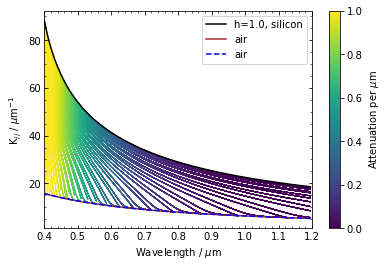

In [4]:
m.plDisp("1umWG-5nmStep")

### Small k VS Big K...

The question was raised if the extinction coefficient of a mode needs to take into account the propagation angle, since the absorption is per distance parallel to the waveguide, but the mode itself may zig-zag and thus have an effective pathlength > than the parallel distance. The alternate version of kappa can be activated by setting OBJ.smk=0, as shown below:

In [6]:
mm=Modedata()
mm.Precision=3     #Lower precision for quicker results
mm.Ldel=.005        #Increase step size for wavelengths to achieve quicker results
mm.smk=0            #Small k=0 sets the extinction coefficent equal to kappa/sin(theta)
mm.generate()     #Generate Modedata
print(mm.beta[mm.mindex[10]])         #Print a random test line, in this case mode #5-TE

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Generating data for 28 modes, current mode:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
[ 5.          0.4        86.13365536  4.75941559 15.70796327]


Let's compare a few points for their extinction coefficient values!

In [5]:
print(mm.beta[mm.mindex[10]+20])         #See how the object changes!
print(m.beta[m.mindex[10]+20])
print('\n')
print(mm.beta[mm.mindex[15]+20])         #See how the object changes!
print(m.beta[m.mindex[15]+20])
print('\n')
print(mm.beta[mm.mindex[30]-2])         #See how the object changes!
print(m.beta[m.mindex[30]-2])

[ 5.          0.5        50.57680586  0.59211846 12.56637061]
[ 5.          0.5        50.57680586  0.55499376 12.56637061]


[ 8.          0.5        46.61216803  0.64248161 12.56637061]
[ 8.          0.5        46.61216803  0.55499376 12.56637061]


[15.          0.525      15.32045115  1.35585231 11.96797201]
[15.          0.525      15.32045115  0.41602466 11.96797201]


Great Stuff!! Now to make more precise calculations without waiting, we can import precompiled data:

### Import / Export Modedata

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
The modedata has been generated.
The current characteristics are:
 Lambda min: 0.4 um, Lambda max: 1.2 um, Lambda step: 0.001 um
 Thickness: 1 um
 um, 
 Layers: ['air', 'silicon', 'air'], 
 Precision: 10 decimal places.


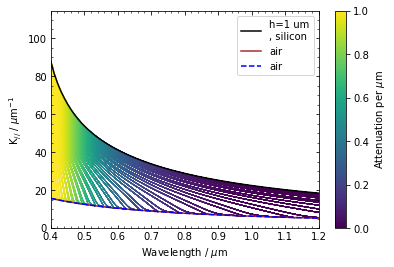

In [7]:
#m.Export("test5nm")
#m.Import("test5nm")
n=Modedata()
n.Import("1umModesSK")   #Import the .dat file with small K and 1 nanometer steps
n.Lsta,n.Lend,n.Ldel=.4,1.2,.001    #Re-adjust the plotting boundaries by changing Lambda bounds
print(n)
n.plDisp("test2")

### Import and compare the Modesolver output of LUMERICAL

In [13]:
from MSclass13 import *
#Import DATA of REFRACTIVE INDEX, These are needed for plotting later
n1r=np.loadtxt("siliconR.txt", skiprows=1) 
n1i=np.loadtxt("siliconI.txt", skiprows=1) 
#Creating interpolated data functions
n1ri=scinter.interp1d(n1r[:,0],n1r[:,1], fill_value='extrapolate')
n1ii=scinter.interp1d(n1i[:,0],n1i[:,1], fill_value='extrapolate')

### Metal Reflector, 1nm steps

The Lumerical Eigenmode Solver does not only output the guided modes, but all radiation that may interact with the waveguide. In order to filter for the waveguided modes, we discard all propagation constants $\beta$ that are smaller that $k_0$. 
Additionally, the data is brought to the same form as the output of our simple modesolver. This is done with the ImportLumerical function, which needs knowledge about the output file layout, i.e. columns per mode, col of beta and alpha. Please provide Thickness afterwards. Only with Lumerical input, another variable OBJ.all exists which holds all mode data, including non TIR modes. You can use these instead by issuing: OBJ.beta=OBJ.all

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0


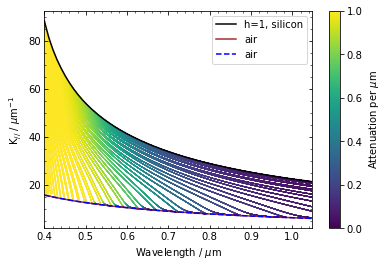

In [1]:
from MSclass13 import *
#LMode=np.loadtxt("Export5-1D-1nmSteps-MetalRef.txt", skiprows=1, delimiter=',')
LM=Modedata() 
LM.ImportLumerical("Export5-1D-1nmSteps-MetalRef.txt",thickness=1, columnspermode=7,firstbetacolumn=4,firstalphacolumn=5)
#THIS Lumerical modedata has 7 columns per mode, first time beta occurs is col 4, first alpha in col. 5
LM.plDisp("LumDispo")
#LM.Export("modesLumericalExport5TIR")
#print(LM.beta)

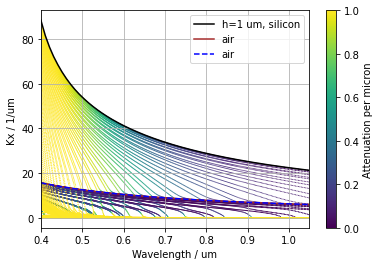

In [3]:
LM.beta=LM.all
LM.makeIndex(LM.beta)
LM.plDisp('LumDispAllx10')
LM.Export('modesLumericalExport5All')

### Metal Reflector, 10um thick silicon

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0


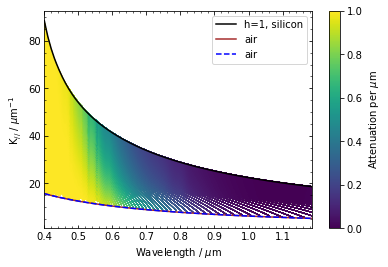

In [3]:
#LMode=np.loadtxt("Export5-1D-1nmSteps-MetalRef.txt", skiprows=1, delimiter=',')
LMB=Modedata() 
LMB.ImportLumerical("Export10-10UM-1D-4nmSteps600modes-AgBR+AR182.txt",thickness=10, columnspermode=7,firstbetacolumn=4,firstalphacolumn=5)
#THIS Lumerical modedata has 7 columns per mode, first time beta occurs is col 4, first alpha in col. 5
LMB.plDisp("LumDispo10um2")
#LMB.Export("modesLumericalExport10-10umTIR")
#print(LM.beta)

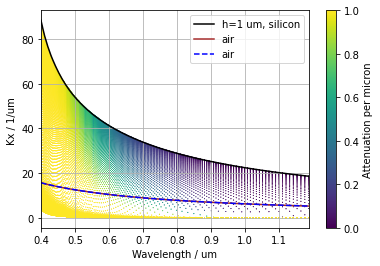

In [14]:
LMB.beta=LMB.all
LMB.makeIndex(LMB.all)
LMB.Export('modesLumericalExport10-10umAll')
LMB.plDisp("LumDispo10umALL")

## Compare Lumerical Modes With Modedata generator


Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Total modes: 62.0


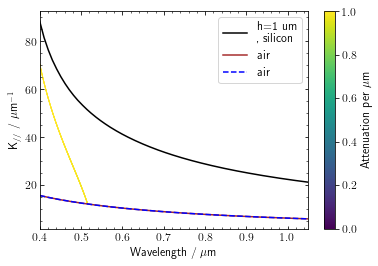

In [15]:
#First, let's filter Lumerical output for a test mode, eg. 15:
m=16
LC=Modedata()
LC.Import('modesLumericalExport5TIR')
print('Total modes:',(LC.beta[-1,0])*2)
LC.plDisp('Amode',m,m+.5) #Since there are two modes with same mode number TE X, and TM X, adding +.5 to the 
#maximum mode yields only the TE mode, while X+0.5 till X+1 would yield the TM mode. 

In [16]:
#Let's extract the section of the beta array containing this mode, and interpolate it.
testmode=LC.beta[LC.mindex[m]:LC.mindex[m+1]]
testfunc=scinter.interp1d(testmode[:,1],testmode[:,2], fill_value='extrapolate')
testfunci=scinter.interp1d(testmode[:,1],testmode[:,3], fill_value='extrapolate')
#print(testmode)

In [25]:
#Now, we import the modesolver generated data and find the mode closest to the Lumerical one:
MC=Modedata()
MC.Import('modes1nmASiA-sk')       #In this case with small K
#MC.plDisp('Bmode',26)
minsum=10**10
for m in range(len(MC.mindex)-1):
    mode=MC.beta[MC.mindex[m]:MC.mindex[m+1]]   #Going through all modes
    xdata=mode[:,1]
    ydata=mode[:,2]
    #print(xdata)
    nsum=np.trapz(abs(ydata-testfunc(xdata)),xdata)/len(xdata)  #calculating the integr. deviation of beta.
    #print(nsum)
    if nsum < minsum:
        minsum=nsum
        minm=m
modeS=MC.beta[MC.mindex[minm]:MC.mindex[minm+1]]        # Returning the mode with least deviation
print('Found modenumber:', minm)
#print(mode)
#MC.plDisp('test')

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Found modenumber: 16


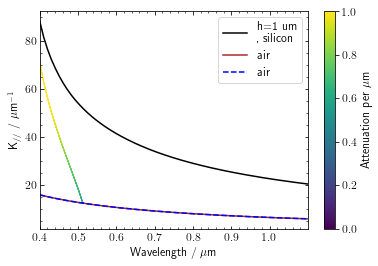

In [28]:
MC.plDisp("testout",minm,minm+.5) #Let's look at the mode

In [26]:
#Now, we import the modesolver generated data and find the mode closest to the Lumerical one:
MC2=Modedata()
MC2.Import('modes1nmASiA-bk')       #In this case with BIG K
#MC.plDisp('Bmode',26)
minsum=10**10
for m in range(len(MC2.mindex)-1):
    mode=MC2.beta[MC2.mindex[m]:MC2.mindex[m+1]]   #Going through all modes
    xdata=mode[:,1]
    ydata=mode[:,2]
    #print(xdata)
    nsum=np.trapz(abs(ydata-testfunc(xdata)),xdata)/len(xdata)  #calculating the integr. deviation of beta.
    #print(nsum)
    if nsum < minsum:
        minsum=nsum
        minm=m
modeB=MC2.beta[MC2.mindex[minm]:MC2.mindex[minm+1]]        # Returning the mode with least deviation
print('Found modenumber:', minm)
#print(mode)
#MC.plDisp('test')

Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Refractive data not accessible: airR.txt, using real value := 1
Refractive data not accessible: airI.txt, using imaginary value := 0
Found modenumber: 16


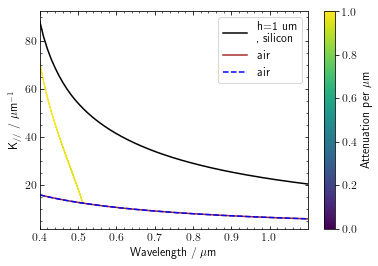

In [30]:
MC2.plDisp("testout2",minm,minm+.5)

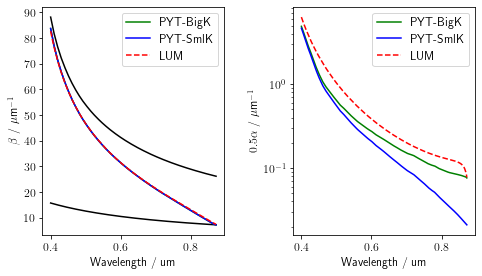

In [37]:
#Plotfunction for Comparing absorption values in mode data
def plModes():			#Plotfunction for refractive index
    Pi=cnt.pi
    fig, ax = plt.subplots(1,2)
    x=modeB[:,1]
    ax[0].plot(x,2*Pi/x*n1ri(x), '-', color='black')
    ax[0].plot(x,2*Pi/x, '-', color='black')
    ax[0].plot(modeB[:,1],modeB[:,2], 'g-', label='PYT-BigK')
    ax[0].plot(modeS[:,1],modeS[:,2], 'b-', label='PYT-SmlK')
    ax[0].plot(x,testfunc(x), 'r--',label='LUM')
    ax[1].plot(modeB[:,1],modeB[:,3], 'g-', label='PYT-BigK')
    ax[1].plot(modeS[:,1],modeS[:,3], 'b-', label='PYT-SmlK')
    ax[1].plot(x,testfunci(x), 'r--',label='LUM')    
    for i in range(2):
        ax[i].set_xlabel('Wavelength / um')
        ax[i].legend()
    ax[0].set_ylabel('$\\beta$ / $\mu$m$^{-1}$')
    ax[1].set_ylabel('$0.5\\alpha$ / $\mu$m$^{-1}$')
    ax[1].set_yscale("LOG")
    #ax.grid()   
    fig.tight_layout()
    fig.set_size_inches(7, 4)
    fig.savefig("compareModes.pdf", bbox_inches='tight')

plModes()

# Calculating the expected absorption

Let us recover eq.$\,$(2.33) of the Master Thesis, which stems from a paper by Yu et al: Fundamental limit of nanophotonic
	light trapping in solar cells. The absorption spectrum for a single resonance of a waveguide is given in by:

$A(\omega)=\frac{\gamma_i\gamma_e}{\left(\omega-\omega_0\right)^2 +\left(\gamma_i+N\gamma_e\right)^2/4},$     $\,\,\,\,$(1)

where $\gamma_i$ describes intrinsic absorption, $\gamma_e$ leakage to other channels (other resonance or free space radiation), $\omega_0$ is the frequency of the resonance, $N$ is the number of channels that are coupled with coupling constant $\gamma_e$.


Integration of the spectrum yields the spectral cross-section, which has unit of frequency. The interpretation as given by Yu et al is as follows: "For an incident spectrum
with bandwidth $\Delta\omega\gg\sigma$, a resonance contributes an additional $\sigma/\Delta\omega$ to the spectrally-averaged absorption coefficient." 


$\sigma=\int_{-\infty}^{\infty} A(\omega)d\omega%\leq\frac{2\pi\gamma_i}{N}$.   $\,\,\,\,$ (2)


If we add the contributions from all individual resonances $m$ in the frequency range $[\omega,\omega+\Delta\omega]$, the upper limit for absorption is found in the equation below:

$A_\mathrm{T}=\frac{1}{\Delta\omega}\sum_m\frac{\sigma_\mathrm{max}}{N}=\frac{1}{\Delta\omega}\sum_m\frac{2\pi\gamma_{i,m}}{N}$.    $\,\,\,\,$ (3)

The number of resonances M is given by (Yu et al., S10): 

M=$\sum\limits_{m=1}^{m_\mathrm{tot}}\frac{2\pi\omega n_m^2}{c_0^2}\frac{L^2}{(2\pi)^2}\delta\omega.$ $\,\,\,\,$ (4)

If the complex refractive index ($n+i\kappa$) for a medium is known, its intrinsic loss rate $\gamma_i$ can be calculated as follows(From Yu et al.):

<!-- $\gamma_i=2\alpha v_\mathrm{G}/n=\frac{4\pi}{\lambda}\kappa\frac{c_0}{n^2},$ -->

$\gamma_i=\alpha_0\frac{c}{n}=2 k''\frac{c}{n}=\frac{4\pi}{\lambda}\kappa\frac{c}{n}$  $\,\,\,\,$ (5)


Now follows the characterization of the channel number $N$, which is assumed the same for all resonances. In the supporting information, the number of channels is approximated as an area fraction in k-space,


$N=\frac{A}{A_m}$, 

where the total area $A$ is calculated from the interval of k-vectors $[k_1,k_2]$ that can be excited by the HUD-pattern, 

$A=\pi\left(k_1^2-k_2^2\right)$,

and $A_m$ is the area occupied by a single resonance at 

$A_m=(\Delta k_m)^2$.


Thus, $N=\frac{\pi\left(k_2^2-k_1^2\right)}{(\Delta k_m)^2}$. $\,\,\,\,$ (6)

Substitution of $M,N$, and $\gamma_i$ into (2) yields:

$\tilde{A}=\frac{1}{\Delta\omega}\sum_\mathrm{m}\frac{4\pi\alpha_m k_m}{\left(k_2^2-k_1^2\right)}$. $\,\,\,\,$ (7)

Next, the analytical solutions for a lambertian scatterer are used to calculate the absorption in the slab. The formula is taken from M.A. Green's "Lambertian Light Trapping
in Textured Solar Cells
and Light-Emitting Diodes:
Analytical Solutions".

There are several equations derived by Green that are more or less approximate depending on the magnitude of the absorption coefficient $\alpha$ times thickness $W$, since also the radial distribution of light intensity from a  lambertian scatterer inside the absorber depends on the product $\alpha W$. The average pathlength of a light ray approaches $W$ for strong absorption $\alpha W>5$, but can increase up to $4W$ in the weak absorptive limit.

The product $\alpha W$ from Green can be identified with $\tilde{A}$ from (7) in our case, since it is unitless and the influence of the thickness is to determine the number of modes that take part in the sum over m.

We'll look at the magnitude of $A_T$ across the spectral range below and decide for the appropriate optical pathlength enhancement factor $f_p$ there. The total absorption $A_{TT}$ is then defined as:

$A_{T}(\omega)=\frac{1-\exp[-f_p \tilde{A}(\omega)]}{1-(1-n_m^{-1})\exp[-f_p \tilde{A}(\omega)]}.$ $\,\,\,\,$ (8)


In order to arrive at the spectrally averaged integrated absorption, summation over $A_{T}(\omega)$ is performed, where each contribution is weighed by the flux of the incident radiation at that wavelength $F_\mathrm{AM1.5}(\omega)$, such that the integrated absorption:

\begin{equation}
IA = \frac{1}{\int_\omega F(\omega) d\omega} \int_\omega A_{T}(\omega) F(\omega) d\omega . \,\,\,\, (9)
\end{equation}

## The algorithm for calculating the expected absorption

There are three code fields following: Starting with the 

1. Initialization,        next come the 

2. definitions of subroutines / equations and functions,  and finally some examplary 

3. plotfunctions for visualization.


The code blocks are best evaluated after one-another with CTRL+ENTER.

## Initialization

In [49]:
#!/bin/python3
#Getting the Libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import numpy as np
from numpy.random import multivariate_normal
import scipy.constants as cnt
from sympy import Eq, var, solve, Symbol
import scipy.interpolate as scinter
from matplotlib.collections import LineCollection


#Global Constants
Pi=cnt.pi
n0=3.645
C0=cnt.c   #Speed of Light in Vacuuo


#Import DATA of REFRACTIVE INDEX
n1r=np.loadtxt("siliconR.txt", skiprows=1) 
n1i=np.loadtxt("siliconI.txt", skiprows=1) 
#Creating interpolated data functions
n1ri=scinter.interp1d(n1r[:,0],n1r[:,1], fill_value='extrapolate')
n1ii=scinter.interp1d(n1i[:,0],n1i[:,1], fill_value='extrapolate')

#Import DATA for the SOLAR SPECTRUM AM1.5
am15=np.loadtxt("AM15G.dat",skiprows=1)#, usecols= (1,2,3,)) # this ARRAY: Lambda (nm), Intensity
am15flux=[]
#Creating a dictionary for the solar flux per lambda in nanometers
amdict={}
for i in am15:
	L=i[0]/1e9              #Wavelength is in column one, in nanometers
	Lmu=round(i[0]/1000,4)  #We save WL also in microns 
	Lint=int(i[0])          # As well as keep it in nm, but make sure it is int
	E=cnt.h*cnt.c/L         # Calculate the photon energy at lambda
	N=i[1]/E                # Calculate the flux at lambda from intensity/energy
	am15flux.append([Lmu,4,N])
	amdict[Lint]=N
am15flux=np.asarray(am15flux)
am15fluxi=scinter.interp1d(am15flux[:,0],am15flux[:,2], fill_value='extrapolate')


#IMPORT THE MODESOLVER OUTPUT
def importModes(name,delim=','): #If this throws an error, check delimiter and skiprows in the file!
    global modes,lambdastart,lambdastep,lambdamax,lambdasteps, lambar
    modes=np.loadtxt(name, delimiter=delim, skiprows=1)
    lambdastart=modes[0,1]
    lambdastep=.0001
    lambdamax=lambdastart
    lambdasteps=0
    i=1
    while lambdamax < modes[i,1]:
        lambdamax=modes[i,1]
        i+=1
    lambdasteps=i
    Lambs=[.4,1.051,lambdastep]
    lambar=[]
    LL,lamb=0.0,1.0
    i=0
    while lamb>LL:
        lambar.append(modes[i,1])
        LL=modes[i,1]
        i+=1
        lamb=modes[i,1]
        lambdastep=round(max(lambdastep,lamb-LL),3)
    print("Found the following mode library characteristics:")
    print("Lambda start/max, step is, total steps",lambdastart,"/",lambdamax, lambdastep, lambdasteps)

## Now follow the definitions of the subroutines and equations

In [41]:
def extractKL(k1,k2,lamb):   #Filter the mode data for points in the wavelength range with k_1<k_m<k_2
    ar1 = modes[np.argsort(modes[:, 2])]
    #print(array,'\n\n')              
    newar=[]
    for line in ar1:
        if line[2]<=k2 and line[2]>=k1:
            newar.append(line)
        if line[2]>k2:
            break
    if len(newar)>0:
        ar2=np.asarray(newar)        
        ar22 = ar2[np.argsort(ar2[:, 1])]
        newar=[]
        for line in ar22:
            if abs(line[1]-lamb)<lambdastep:
                newar.append(line)
        if len(newar)>0:
            ar3=np.asarray(newar)
            ar33=ar3[np.argsort(ar3[:, 0])]
            return ar33
        else:
            return 0
    else:
        return 0
    
    #Equation 7	Version as outlined above
def eq7a(lamb,k1,k2):		#Equation 7
    array=extractKL(k1,k2,lamb)
    #print(array)
    k0=2*Pi/lamb
    #if len(array)==1: #If no modes exist / are found
    if isinstance((array), int):    
        return 0.0
        #print("empty array")
    else:
        res=0.0
        for line in array:
            km=line[2]      #Propagation constant is in column 3
            alpha=2*line[3] #Extinction coefficient in column 4
            nm=km/k0
            res+= 2*Pi*alpha*km/(k2**2-k1**2)
        return res		

    
    #Equation 7	With N_m evaluated through Femius' equation, compare with Thesis sec. (2.2)
def eq7b(lamb,k1,k2):
    array=extractKL(k1,k2,lamb)
    #print(array)
    k0=2*Pi/lamb
    #if len(array)==1: #If no modes exist / are found
    if isinstance((array), int):    
        return 0.0
        #print("empty array")
    else:
        res=0.0
        for line in array:
            km=line[2]
            alpha=2*line[3]
            alpha=averab(line[1])
            nm=km/k0
            res+= 2*Pi**2*alpha*km*nm/(k2**2-k1**2)
        return res		

def eq8a(alpha,lamb): #Equation 8, without enhancement (cp. with green2002:Analytical solutions)
    n=n1ri(lamb)
    return (1 - np.exp(-alpha) )/ (1 - (1 - 1/n**2)*np.exp(-alpha)  )


def eq8b(alpha,lamb): #Equation 8    with optical path enhancement factor f_p = 4
    n=n1ri(lamb)
    return (1 - np.exp(-4*alpha) )/ (1 - (1 - 1/n**2)*np.exp(-4*alpha)  )

def IA(k1,k2,eq7,eq8):       #Integration of EQ8 over Wavelengths weighed by the AM1.5 Spectrum
    if k1<k2:
        xdata=np.arange(.4,1.051,lambdastep)
        #Ls=np.arange(Lstart,Lend+Ld,Ld)
        A=[eq8(eq7(x,k1,k2),x) for x in xdata]
        A=np.asarray(A)
        tot=np.trapz(am15fluxi(xdata)*A,xdata)
        norm=np.trapz(am15fluxi(xdata),xdata)        
        return tot/norm
    else:
        return 0.0

#Some additional functions for individual inspection

def lambertAb(lamb,thick):  #Single-Pass Absorption with Lambert-Beer law
    return (1-np.exp(-2*n1ii(lamb)*thick*2*cnt.pi/lamb))

#Calculate the absorption coefficient for a certain free space lambda, a=2*im(n)*k0
def averab(lamb):
	alpha=2*2*Pi*n1ii(lamb)/(lamb)
	return alpha

def gammai(lamb):    #Calculate the intrinsic loss rate gamma_i for certain lambda
    n=n1ri(lamb)
    c=C0
    alpha=averab(lamb)*10**6     #For meters since averab is in 1/um
    return alpha*c/n

## Quick explanation of the functions above

__extractKL(k1,k2,lamb)__
    #Extract all modes with certain wavelength: lamb and propagation constant: k1 <= beta <= K2 and return in separate Array

__eq7a(lamb,k1,k2)__ #Equation 7, version as above for specific lambda

__eq7b(lamb,k1,k2)__ #Equation 7, version with N_m from Femius' equation (cp. Thesis sec. 2.2) for specific lambda

__eq8a(alpha)__     #Equation 8 with f_p=1, alpha the argument is supposed to be the return value of eq7

__eq8b(alpha)__     #Equation 8 with f_p=4, alpha the argument is supposed to be the return value of eq7

__IA(k1,k2,eq7,eq8,Lstart,Lend,Ld)__
    #Spectrally averaged integrated absorption found through convolution of (8) with air mass 1.5 spectrum

In [56]:
#Let's test Eq. 7 with different f_p
importModes("modes1nmASiA-sk.dat")
print("f_p=1, EQ(7) as above, IA:",IA(10,20,eq7a,eq8a))
print("f_p=4, EQ(7) as above, IA:",IA(10,20,eq7a,eq8b))

Found the following mode library characteristics:
Lambda start/max, step is, total steps 0.4 / 1.099 0.001 700
f_p=1, EQ(7) as above, IA: 0.7865591887591991
f_p=4, EQ(7) as above, IA: 0.9181162765663922


In [57]:
#Now we look at the same calculations with the BIG K definition:
importModes("modes1nmASiA-bk.dat")
print("f_p=1, EQ(7) as above, IA:",IA(10,20,eq7a,eq8a))
print("f_p=4, EQ(7) as above, IA:",IA(10,20,eq7a,eq8b))

Found the following mode library characteristics:
Lambda start/max, step is, total steps 0.4 / 1.099 0.001 700
f_p=1, EQ(7) as above, IA: 0.8472402286828337
f_p=4, EQ(7) as above, IA: 0.942344525910463


In [58]:
#And the same again with Lumerical mode data:
importModes("modesLumericalExport5TIR.dat")
print("f_p=1, EQ(7) as above, IA:",IA(10,20,eq7a,eq8a))
print("f_p=4, EQ(7) as above, IA:",IA(10,20,eq7a,eq8b))

Found the following mode library characteristics:
Lambda start/max, step is, total steps 0.3997 / 1.0482 0.004 464
f_p=1, EQ(7) as above, IA: 0.9640343834679671
f_p=4, EQ(7) as above, IA: 0.9957374437436671


## Plotfunctions for the estimated absorption

In [118]:
#First a quick data-export function, to save the long calculated data
def Fileprint(name,array):
    file=open("{}.dat".format(name), 'w')
    #file.write('')
    file.close()
    file=open("{}.dat".format(name), 'a')
    sr=''
    for line in range(len(array)):
        sr=''
        for i in range(len(array[line])):
            sr+=str(array[line,i])
            sr+=','
        sr=sr[:-1]
        sr+='\n'
        file.write(sr)
    file.close()

#Plotfunction of Absorption for some k1,k2
def plAbsorption(k1,k2,eq7,eq8,name=''):
    xdat=np.asarray(np.arange(lambdastart,lambdamax+lambdastep,lambdastep))
    ydat=np.asarray([ eq8(eq7(x,k1,k2),x) for x in xdat])
    ydat2=np.asarray([ lambertAb(x,1) for x in xdat])
    ex=[[xdat[i],ydat[i]] for i in range(len(xdat))]
    np.savetxt("Absorpv13{}-{}-{}.dat".format(name,k1,k2), np.asarray(ex), delimiter=',')
    fig, ax = plt.subplots(1,1)
    #ax.plot(xdat,ydat, 'g--', label='EQ8,k1={}, k2={}'.format(k1,k2))
    ax.scatter(xdat,ydat,s=1, label='EQ8,k1={}, k2={}'.format(k1,k2))
    ax.plot(xdat,ydat2, 'b--', label='Single-Pass')
    ax.set_xlabel('Wavelength / microns')
    ax.set_ylabel('Absorption')
    ax.grid()
    ax.legend()
    fig.savefig("Absorption{}-{}-{}.pdf".format(name,k1,k2), bbox_inches='tight')
    
# PLOT K1 vs K2, takes LONG time if delta is small and kmax-kmin is large!
def plk1k2(kmin,kmax,eq7,eq8,name='Test'):			#Plotfunction of dispersion/absorption for kx vs. k0 for thickness h (um), name output name
    delta=1
    ks=np.arange(kmin,kmax,delta)
    abbs=[]
    #abbs=[[IAp(p,j,eq7,eq8,*Lambs) for j in ks] for p in ks]  # Use this line and comment out loop below to suppress progress output.
    print("current k:",end="")
    for j in ks:
        print(" ,",j,end="")
        for p in ks:
            abbs.append([j,p,IA(j,p,eq7,eq8)])
    abbs=np.asarray(abbs)  
    Fileprint("IA{}-{}-{}".format(name,kmin,kmax), abbs)
    fig, ax = plt.subplots(1,1)		
    ax.scatter(abbs[:,0],abbs[:,1], marker=',',s=700*delta**2, c=abbs[:,2], vmin=0,vmax=1)
    ax.set_xlabel('K1 / $\mu$m$^{-1}$')
    ax.set_ylabel('K2 / $\mu$m$^{-1}$')
    ax.set_title("Spectrally averaged Integrated Absorption")
    fig.colorbar(ax.collections[0],ax=ax,label='Absorption')
    ax.grid()
    #ax.legend()
    fig.savefig("K1vsK2-{}-Ks{}-{}.pdf".format(name,kmin,kmax), bbox_inches='tight') #,norm=mpl.colors.Normalize(vmin=0.3, vmax=.5)) 



#Plotfunction for AM spectrum and absorbed fraction               
def plSpectrum(k1,k2,eq7,eq8):			#Plotfunction for AM spectrum and absorbed fraction
    fig, ax = plt.subplots(1,1)
    x=np.asarray(am15[:,0]/1000)
    y=np.asarray(am15[:,1])
    #y2=[absorp(abscoeff(o,k1,k2)) for o in x]
    y3=np.asarray([eq8(eq7(o,k1,k2),o) for o in x])
    y4=np.asarray([(lambertAb(u,1)) for u in x])
    ax.plot(x,y, '-', color='b',	label='AM1.5 Spectrum')
    ax.plot(x,y4*y, '--', color='y',	label='Single Pass Lambert')
    ax.plot(x,y3*y, '--', color='grey',	label='EQ8,{0:.1f}-{1:.1f} IA={2:.3f}'.format(k1,k2,IA(k1,k2,eq7,eq8)))
    #ax.plot(n1i[:,0],n1i[:,1], 'g--', color='g',	label='im')
    ax.set_xlabel('Wavelength / $\mu$m')
    ax.set_ylabel('(Absorbed) Irradiation / W/m**2/micron')
    ax.set_xlim(.400,1.200)
    ax.grid()
    ax.legend()
    fig.savefig("AM1.5and-k1k2-{}-{}.pdf".format(k1,k2), bbox_inches='tight')

    
#Plotfunction for refractive index
def plRef():			#Plotfunction for refractive index
    fig, ax = plt.subplots(1,1)
    ax.plot(n1r[:,0],n1r[:,1], 'g--', color='b',	label='real')
    ax.plot(n1i[:,0],n1i[:,1], 'g--', color='g',	label='im')
    ax.set_xlabel('Wavelength / um')
    ax.set_ylabel('Absorption')
    ax.grid()   
    ax.set_yscale('log')
    ax.legend()
    fig.savefig("RefractiveIndex.pdf", bbox_inches='tight')


### Plot for some k1, k2 values absorption, IA, or IA for an array of k1, k2 values

Found the following mode library characteristics:
Lambda start/max, step is, total steps 0.4 / 1.099 0.001 700


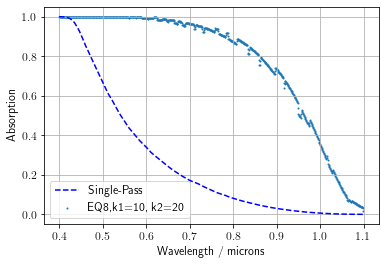

In [86]:
#Plotfunction of Absorp for k1=10,k2=20 
importModes("modes1nmASiA-bk.dat")
plAbsorption(10,20,eq7a,eq8a,'ASiAbk') 

In [100]:
#importModes("modes1nmASiA-sk.dat")
#plAbsorption(15,25,eq7a,eq8a) 

In [101]:
#plSpectrum(10,25,eq7a,eq8a)

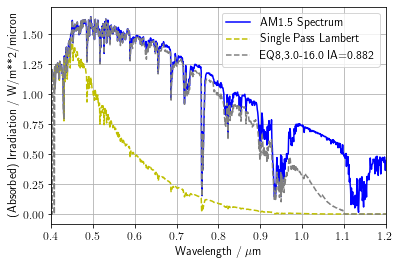

In [102]:
#plSpectrum(3,16,eq7a,eq8a)
plSpectrum(3,16,eq7a,eq8b)

current k: , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19

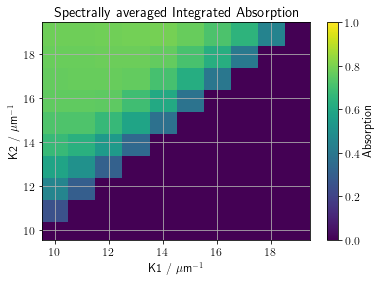

In [119]:
plk1k2(10,20,eq7a,eq8a)

### Eq. (7) vs. $\alpha_0\cdot W$

In [103]:
#importModes("modesLumericalExport5TIR.dat")
importModes("modes1nmASiA-sk.dat")
def plEQ7(k1,k2):			#Plotfunction for intrinsic loss rate gamma_i
    fig, ax = plt.subplots(1,1)
    x=np.arange(.4,1.1,lambdastep)
    y=[eq7a(xx,k1,k2) for xx in x]
    y2=averab(x)
    y3=[eq7b(xx,k1,k2) for xx in x]
    ax.plot(x,y, label='EQ7-As Above')
    ax.plot(x,y3, label='EQ7-Femius')
    ax.plot(x,y2, label='$\\alpha_0\cdot W$')
    ax.set_yscale('log')
    ax.set_xlim([.4,1.051])
    ax.set_ylabel('\tilde{A} vs $\\alpha$ W / numerical')
    ax.set_xlabel('Wavelength / microns')
    ax.grid()   
    ax.legend()
    fig.savefig("EQ7-k{}-k{}.pdf".format(k1,k2), bbox_inches='tight')
#plEQ7(10,20)

Found the following mode library characteristics:
Lambda start/max, step is, total steps 0.4 / 1.099 0.001 700
